# Data Preprocessing

In [98]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans

In [99]:
# Load the dataset
data_path = os.path.abspath(os.path.join(os.pardir, 'data/Physical_Activity_Monitoring_unlabeled.csv'))
raw = pd.read_csv(data_path)
print(f"There are {len(raw)} entries in this dataset")
raw.head()

There are 534601 entries in this dataset


,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,252.75,34.8750,0.902847,7.45872,6.032490,1.006100,7.44575,6.303650,-0.021952,0.004114,...,-0.025606,0.030239,-14.5447,27.3336,-5.76620,0.206416,0.348212,0.763201,-0.503652,5
1,3652.45,29.7500,-4.069330,3.76168,8.279720,-5.972500,3.22273,6.908970,0.116054,-0.375968,...,-0.670163,1.786200,-32.8257,-15.7719,-1.31395,0.578332,-0.566734,0.405888,-0.423791,2
2,504.76,34.3750,-2.007540,-9.60180,0.773674,-1.803500,-9.58937,1.073680,0.020131,0.042189,...,-0.009741,-0.006579,-18.8171,16.3089,25.29280,0.139776,0.676586,0.393796,0.606316,8
3,2801.61,31.9375,-13.262200,5.85443,0.899334,-13.611500,5.91511,0.840377,1.715630,-0.050492,...,-0.163470,-3.495570,-26.7418,34.3566,21.32740,0.416303,0.783387,0.306464,0.345075,2
4,441.01,33.5000,-0.013940,8.66540,4.398210,0.144153,8.56816,4.822200,-0.006938,-0.007383,...,-0.028172,-0.003737,-17.7798,-3.9981,10.99500,0.171133,-0.748343,0.252988,-0.588807,6


In [100]:
# Drop columns that are not useful
# raw.drop(["subject_id"], axis=1, inplace=True)

# Drop additional highly correlated features identified in eda notebook 
raw.drop(["handAcc16_1", "handAcc16_2", "handAcc16_3", "chestAcc16_1", "chestAcc16_2", "chestAcc16_3", 
          "chestOrientation3", "ankleAcc16_1", "ankleAcc16_2"], axis=1, inplace=True)
raw.head(5)

,timestamp,handTemperature,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,252.75,34.8750,1.006100,7.44575,6.303650,-0.021952,0.004114,-0.000752,-9.99538,7.22910,...,-0.025606,0.030239,-14.5447,27.3336,-5.76620,0.206416,0.348212,0.763201,-0.503652,5
1,3652.45,29.7500,-5.972500,3.22273,6.908970,0.116054,-0.375968,-0.012890,40.45580,-1.19692,...,-0.670163,1.786200,-32.8257,-15.7719,-1.31395,0.578332,-0.566734,0.405888,-0.423791,2
2,504.76,34.3750,-1.803500,-9.58937,1.073680,0.020131,0.042189,-0.011507,7.26741,24.43790,...,-0.009741,-0.006579,-18.8171,16.3089,25.29280,0.139776,0.676586,0.393796,0.606316,8
3,2801.61,31.9375,-13.611500,5.91511,0.840377,1.715630,-0.050492,-1.829000,46.48220,-7.83916,...,-0.163470,-3.495570,-26.7418,34.3566,21.32740,0.416303,0.783387,0.306464,0.345075,2
4,441.01,33.5000,0.144153,8.56816,4.822200,-0.006938,-0.007383,-0.032679,3.97764,-22.42320,...,-0.028172,-0.003737,-17.7798,-3.9981,10.99500,0.171133,-0.748343,0.252988,-0.588807,6


### Data Sorting

In [101]:
# sort data by subject_id and timestamp for time series data preprocessing
raw_sorted = raw.sort_values(["subject_id", "timestamp"], ascending=True)
raw_sorted.head(5)


,timestamp,handTemperature,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
54744,37.66,30.375,2.24689,8.55387,5.77143,-0.004750,0.037579,-0.011145,8.93200,-67.9326,...,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1.0,0.0,0.0,0.0,1
440445,37.70,30.375,2.20720,7.24042,5.95555,-0.069961,-0.018328,0.004582,9.15626,-67.1825,...,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.0,0.0,0.0,0.0,1
238954,37.71,30.375,2.19238,7.21038,6.01604,0.063895,0.007175,0.024701,8.60505,-66.7184,...,-0.026906,0.004125,-61.3257,-36.9744,-57.7501,1.0,0.0,0.0,0.0,1
22854,37.72,30.375,2.23988,7.46679,6.03053,0.190837,0.003116,0.038762,9.16003,-66.8578,...,-0.032277,-0.006866,-61.5520,-36.9632,-57.9957,1.0,0.0,0.0,0.0,1
366131,37.74,30.375,2.28637,7.70801,5.93935,0.204098,-0.068256,0.050000,9.15218,-67.0705,...,0.020393,-0.011880,-61.7741,-37.1744,-58.1199,1.0,0.0,0.0,0.0,1


### Imputation

In [102]:
def median_imputaion(df):
    df_imputed = df.copy()
    for col in df_imputed.columns:
        col_median = df_imputed[col].median() # Fill the missing value with median due to skewness
        df_imputed[col].fillna(col_median, inplace=True)
    return df_imputed

In [103]:
def interpolation(df, **kargs):
    df_imputed = df.copy()
    df_imputed.interpolate(**kargs)
    return df_imputed

In [104]:
raw_imputed = interpolation(raw_sorted, method="linear", axis=0, inplace=True)
raw_imputed.head(5)

,timestamp,handTemperature,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
54744,37.66,30.375,2.24689,8.55387,5.77143,-0.004750,0.037579,-0.011145,8.93200,-67.9326,...,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1.0,0.0,0.0,0.0,1
440445,37.70,30.375,2.20720,7.24042,5.95555,-0.069961,-0.018328,0.004582,9.15626,-67.1825,...,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.0,0.0,0.0,0.0,1
238954,37.71,30.375,2.19238,7.21038,6.01604,0.063895,0.007175,0.024701,8.60505,-66.7184,...,-0.026906,0.004125,-61.3257,-36.9744,-57.7501,1.0,0.0,0.0,0.0,1
22854,37.72,30.375,2.23988,7.46679,6.03053,0.190837,0.003116,0.038762,9.16003,-66.8578,...,-0.032277,-0.006866,-61.5520,-36.9632,-57.9957,1.0,0.0,0.0,0.0,1
366131,37.74,30.375,2.28637,7.70801,5.93935,0.204098,-0.068256,0.050000,9.15218,-67.0705,...,0.020393,-0.011880,-61.7741,-37.1744,-58.1199,1.0,0.0,0.0,0.0,1


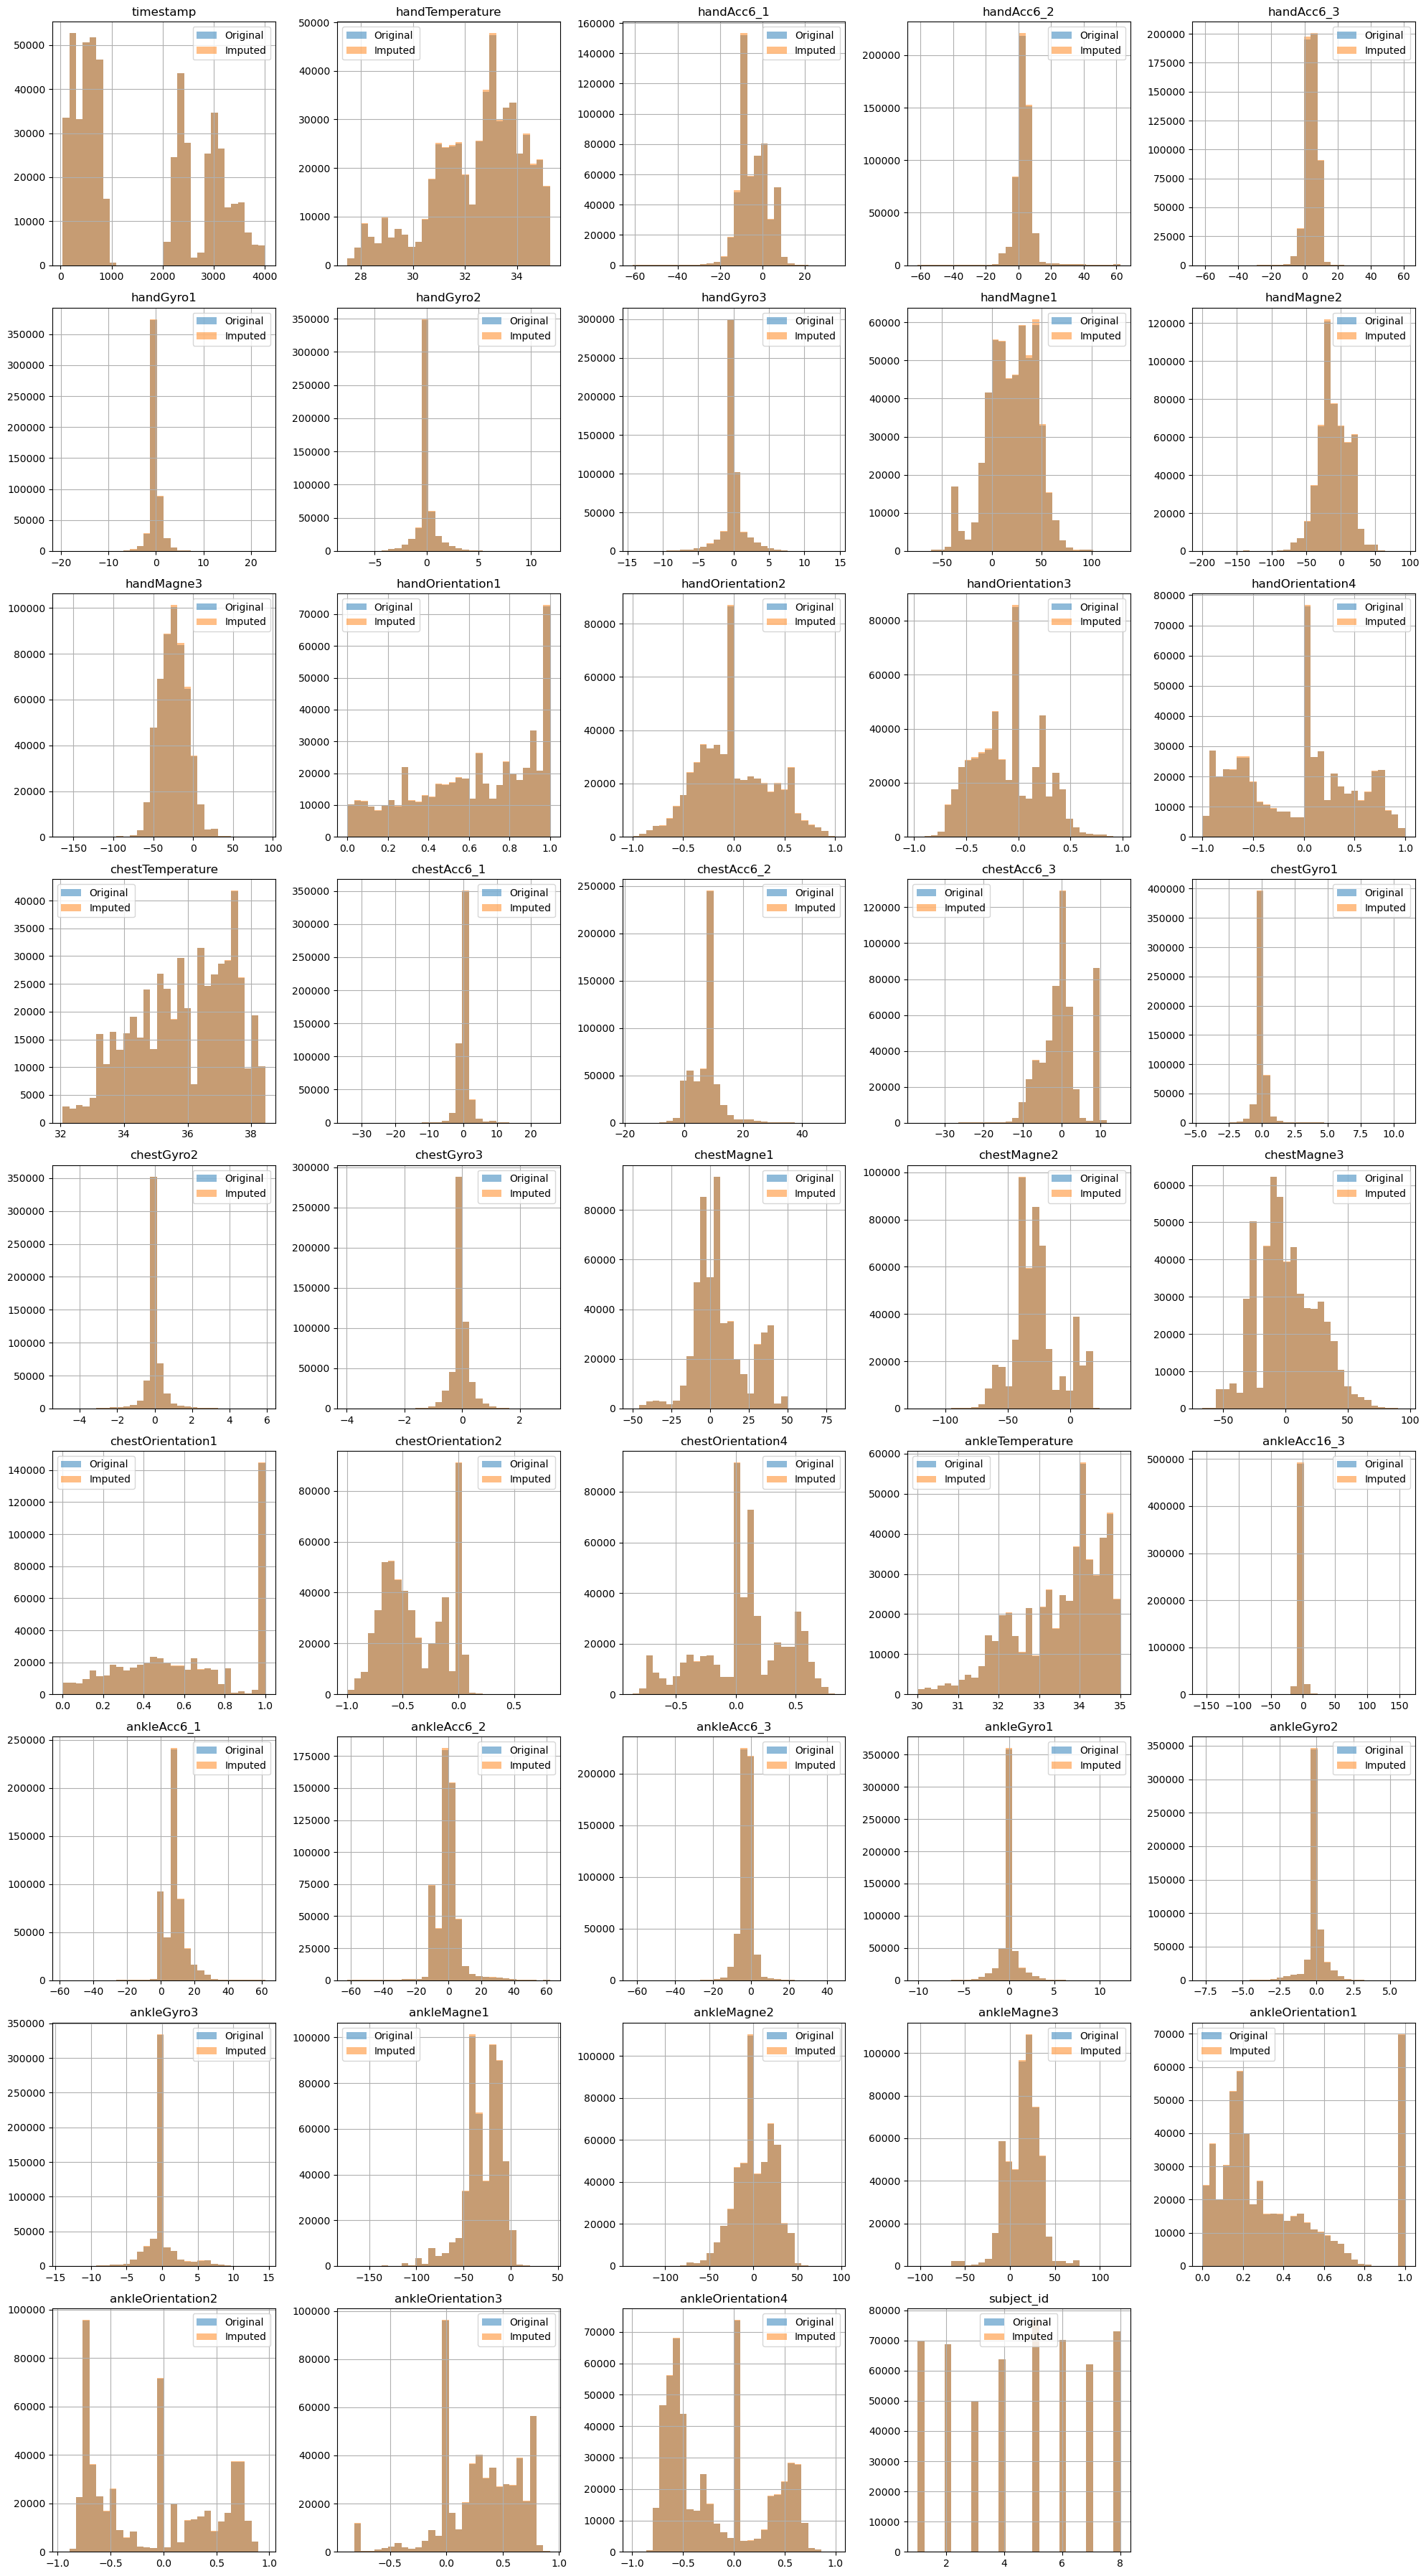

In [105]:
def plot_hist_comparison(df1, df2, df1_label='Original', df2_label='Imputed'):
    # Ensure both dataframes have the same columns
    assert df1.columns.equals(df2.columns), "DataFrames must have the same columns"
    
    # Plot histograms for each column
    data_columns = df1.columns

    # Determine the number of rows and columns for subplots
    n_cols = 5
    n_rows = int(np.ceil(len(data_columns) / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

    for i, column in enumerate(data_columns):
        ax = axes[i // n_cols, i % n_cols]
        df1[column].hist(ax=ax, bins=30, alpha=0.5, label=df1_label)
        df2[column].hist(ax=ax, bins=30, alpha=0.5, label=df2_label)
        ax.set_title(column)
        ax.legend()

    # Hide any unused subplots
    for j in range(i + 1, n_rows * n_cols):
        fig.delaxes(axes[j // n_cols, j % n_cols])

    plt.tight_layout()
    plt.show()


# Compare df before and after imputation
plot_hist_comparison(raw, raw_imputed)

### High Pass Filter

In [106]:
def high_pass_filter(df, target_cols, kernel=[-1, 1]):
    df_filtered = df.copy()
    for col in target_cols:
        col_filtered = np.convolve(df[col], kernel, mode="same")
        df_filtered[col] = col_filtered
    return df_filtered

In [107]:
filter_target_col = raw_imputed.columns[1:]
raw_filtered = high_pass_filter(raw_imputed, filter_target_col)
raw_filtered.head(5)

,timestamp,handTemperature,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
54744,37.66,-30.375,-2.24689,-8.55387,-5.77143,0.004750,-0.037579,0.011145,-8.93200,67.9326,...,0.027714,-0.001752,61.1081,36.8636,58.3696,-1.0,0.0,0.0,0.0,-1
440445,37.70,0.000,0.03969,1.31345,-0.18412,0.065211,0.055906,-0.015727,-0.22426,-0.7501,...,0.021164,0.008080,-0.9041,0.2589,-0.4849,0.0,0.0,0.0,0.0,0
238954,37.71,0.000,0.01482,0.03004,-0.06049,-0.133856,-0.025502,-0.020119,0.55121,-0.4641,...,-0.021972,-0.010453,1.1217,-0.1481,-0.1346,0.0,0.0,0.0,0.0,0
22854,37.72,0.000,-0.04750,-0.25641,-0.01449,-0.126942,0.004058,-0.014061,-0.55498,0.1394,...,0.005371,0.010992,0.2263,-0.0112,0.2456,0.0,0.0,0.0,0.0,0
366131,37.74,0.000,-0.04649,-0.24122,0.09118,-0.013261,0.071373,-0.011239,0.00785,0.2127,...,-0.052670,0.005014,0.2221,0.2112,0.1242,0.0,0.0,0.0,0.0,0


### Feature scaling

In [108]:
# Apply scaling for PCA
def scale_data(data, scaler = StandardScaler()):
    raw_scaled = data.copy()
    raw_scaled = pd.DataFrame(scaler.fit_transform(raw_scaled), index=data.index)
    raw_scaled.columns = data.columns
    return raw_scaled

In [109]:
scaler = MinMaxScaler() # Can be adjusted as needed

raw_scaled = scale_data(raw_filtered, scaler)
raw_scaled.head(5)

,timestamp,handTemperature,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
54744,0.000000,0.000000,0.516783,0.387992,0.431763,0.468279,0.366379,0.565573,0.393028,1.000000,...,0.569240,0.495722,0.793858,0.792788,0.964453,0.000000,0.507569,0.490822,0.466068,0.0
440445,0.000010,0.929254,0.532346,0.451072,0.475675,0.469410,0.371452,0.564746,0.462361,0.584389,...,0.568828,0.496061,0.455526,0.545087,0.517116,0.502301,0.507569,0.490822,0.466068,1.0
238954,0.000013,0.929254,0.532177,0.442867,0.476647,0.465687,0.367035,0.564611,0.468536,0.586119,...,0.566118,0.495422,0.466578,0.542333,0.519778,0.502301,0.507569,0.490822,0.466068,1.0
22854,0.000015,0.929254,0.531752,0.441036,0.477008,0.465816,0.368639,0.564797,0.459728,0.589771,...,0.567836,0.496162,0.461693,0.543260,0.522668,0.502301,0.507569,0.490822,0.466068,1.0
366131,0.000020,0.929254,0.531759,0.441133,0.477839,0.467942,0.372292,0.564884,0.464209,0.590215,...,0.564189,0.495955,0.461670,0.544765,0.521745,0.502301,0.507569,0.490822,0.466068,1.0


In [110]:
# keep a copy of the timestamp column and add it back later after pca
timestamp = raw_scaled["timestamp"]

### Log Transformation

In [111]:
# Apply log transformation to handle outlier and skewness
# raw_logged = np.log1p(raw_scaled)
# raw_logged.to_pickle('../data/raw_logged.pkl') # save

### Column Subsets

In [112]:
# print(raw_logged.columns)

In [113]:
# # Subset the data by category
# hand_data = raw_logged.filter(regex='hand')
# chest_data = raw_logged.filter(regex='chest')
# ankle_data = raw_logged.filter(regex='ankle')

# # Remove the timestamp column from the subsets (if it exists)
# hand_data.drop(columns='timestamp', errors='ignore', inplace=True)
# chest_data.drop(columns='timestamp', errors='ignore', inplace=True)
# ankle_data.drop(columns='timestamp', errors='ignore', inplace=True)

# # Keep a copy of the timestamp column
# timestamp = raw_scaled["timestamp"]

In [114]:
# Helper method to apply PCA
# def apply_pca(subset, variance_threshold=0.8):
#     pca = PCA(n_components=variance_threshold)
#     principal_components = pca.fit_transform(subset)
#     pca_columns = [f'{subset.columns[0].split("_")[0]}_PC{i+1}' for i in range(principal_components.shape[1])]
#     return pd.DataFrame(principal_components, columns=pca_columns)

In [115]:
# Apply PCA for all columns
# hand_pca = apply_pca(hand_data)
# chest_pca = apply_pca(chest_data)
# ankle_pca = apply_pca(ankle_data)

In [116]:
# Combine the principal components with the timestamp column
# combined_data = pd.concat([timestamp, hand_pca, chest_pca, ankle_pca], axis=1)
# combined_data.head()

In [117]:
# Save to pickle
# combined_data.to_pickle('../data/pca_with_subsets.pkl')
# print("done")

### Dimensionality Reduction

In [130]:
# Perform PCA

def perform_pca(df, component=0.8):
    pca_df = df.copy()
    pca = PCA(n_components=component)
    principal_components = pca.fit_transform(pca_df)
    pca_df = pd.DataFrame(data=principal_components, 
                          columns=[f'PC{i+1}' for i in range(principal_components.shape[1])],
                          index = pca_df.index)
    print(f'Number of components selected: {principal_components.shape[1]}')
    print(f'Cumulative explained variance: {np.cumsum(pca.explained_variance_ratio_)}')
    return pca_df

In [131]:
pca_df = perform_pca(raw_scaled, 0.95)
pca_df.head(5)

Number of components selected: 7
Cumulative explained variance: [0.91164302 0.92082756 0.92852153 0.93539038 0.9408752  0.94604975
 0.95104489]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
54744,-0.391981,-0.072599,0.130924,0.097482,-0.067807,-0.006120,-0.011211
440445,-0.391892,0.000947,-0.003173,-0.002236,-0.000362,-0.000079,-0.004144
238954,-0.391889,-0.000039,0.000776,0.000887,-0.000132,-0.000006,0.000481
22854,-0.391887,0.000103,-0.000875,-0.001072,-0.001473,-0.000106,0.000182
366131,-0.391882,-0.000056,0.000174,0.000604,0.001054,0.000066,0.000543


In [133]:
pca_df.to_pickle('../data/pca_df.pkl') # save

In [121]:
# Explained variance plot
# plt.figure(figsize=(10, 6))
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.title('Explained Variance by Components')
# plt.show()

In [122]:
# Find a specific number of components that explain at least 95% of the variance
# pca = PCA(n_components=0.8) # Adjust if needed
# principal_components = pca.fit_transform(raw_logged)
# pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

In [123]:
# Number of components selected
# n_components = pca_df.n_components_
# print(f'Number of components selected: {n_components}')

# # Check principal components
# pca_df.head()

In [124]:
# Explained variance ratio of each component
# explained_variance_ratio = pca.explained_variance_ratio_
# print(f'Explained variance ratio of each component: {explained_variance_ratio}')

# # Cumulative explained variance
# cumulative_explained_variance = np.cumsum(explained_variance_ratio)
# print(f'Cumulative explained variance: {cumulative_explained_variance}')

In [125]:
# Plot explained variance ratio
# plt.figure(figsize=(10, 6))
# plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='individual explained variance')
# plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='cumulative explained variance')
# plt.xlabel('Principal Components')
# plt.ylabel('Explained Variance Ratio')
# plt.title('Explained Variance by Principal Components')
# plt.legend(loc='best')
# plt.show()

In [126]:
# Check correlation again after PCA
# pca_corr = pca_df.corr()

# plt.figure(figsize=(8, 6))
# sns.heatmap(pca_corr, annot=True, cmap='coolwarm', linewidths=.5)
# plt.show()

In [127]:
# Remove feature pairs with high correlation after PCA
# pca_df.drop("PC2", axis=1, inplace=True)

In [128]:
# Data integrity check: no NaNs or infinite values
# assert not np.any(np.isnan(principal_components))
# assert not np.any(np.isinf(principal_components))

### Save DataFrame

In [129]:
# pca_df.to_pickle('../data/pca_df.pkl')
# print("done")